In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import jaxqualin.postprocess
import jaxqualin.plot
import jaxqualin.qnmode

from jaxqualin.postprocess import *
from jaxqualin.plot import *
from jaxqualin.qnmode import *

2023-09-29 08:05:36.181965: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-29 08:05:37.921362: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-29 08:05:38.020464: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
from importlib import reload

In [5]:
reload(jaxqualin.postprocess)
from jaxqualin.postprocess import *
reload(jaxqualin.plot)
from jaxqualin.plot import *
reload(jaxqualin.qnmode) 
from jaxqualin.qnmode import *

In [6]:
# from pmlb import fetch_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np


In [7]:
import sys
import os

In [8]:
os.environ["PATH"] = "/home/mcheung1/julia-1.9.0/bin"+ os.pathsep + os.environ["PATH"]

In [9]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [10]:
settingname = "normal2"

ROOT_PATH = jaxqualin_path
PLOT_PATH = os.path.join(ROOT_PATH, f"plots/{settingname}/")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")

In [11]:
runname = "normal2_prodB1"
runname_validation = "normal2_prodB3"

df = pd.read_csv(f"../../pickle/data_frame/{runname}_physical.csv")
df = classify_modes(df)
df = df_change_retro_to_pro(df)

In [12]:
df_validation = pd.read_csv(f"../../pickle/data_frame/{runname_validation}_physical.csv")
df_validation = classify_modes(df_validation)
df_validation = df_change_retro_to_pro(df_validation)

In [13]:
df_full = pd.concat([df, df_validation])

In [14]:
def adjust_phi(row, df):
    phi_med = row['phi_med']
    SXS_num = row['SXS_num']
    retro = row['retro']
    mode_string = row['mode_string']
    if mode_string == 'constant':
        return phi_med
    m = int(mode_string.split('.')[1])
    row_220 = df[(df['SXS_num'] == SXS_num)&(df['l'] == 2)&(df['m'] == 2)&(df['mode_string'] == '2.2.0')]
    phi_220 = row_220['phi_med'].values[0]
    retro_fac = -1 if retro else 1
    return 2*phi_med - phi_220*np.abs(m)

In [15]:
phi_med_adj_col_full = df_full.apply(lambda row: adjust_phi(row, df_full), axis=1)
df_full['phi_med_adj'] = phi_med_adj_col_full % (2*np.pi)

In [16]:
phi_med_adj_col = df.apply(lambda row: adjust_phi(row, df), axis=1)
df['phi_med_adj'] = phi_med_adj_col % (2*np.pi)

In [17]:
# PN_dom_func = {
#     (2,2): lambda eta: eta,
#     (2,1): lambda eta: eta*np.sqrt(1 - 4*eta),
#     (3,3): lambda eta: eta*np.sqrt(1 - 4*eta),
#     (3,2): lambda eta: eta*(1 - 3*eta),
#     (3,1): lambda eta: eta*np.sqrt(1 - 4*eta),
#     (4,4): lambda eta: eta*(1 - 3*eta),
#     (4,3): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 2*eta),
#     (4,2): lambda eta: eta*(1 - 3*eta),
#     (4,1): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 2*eta),
#     (5,5): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 2*eta),
#     (6,6): lambda eta: eta*(1 - 5*eta + 5*eta**2),
#     (7,7): lambda eta: eta*np.sqrt(1 - 4*eta)*(1 - 4*eta + 3*eta**2),
#     (8,8): lambda eta: eta*(1 - 7*eta + 14*eta**2 - 7*eta**3),
# }

# dom_func_tex_string = {
#     (2,2): r"$\eta$",
#     (2,1): r"$\eta\sqrt{1 - 4\eta}$",
#     (3,3): r"$\eta\sqrt{1 - 4\eta}$",
#     (3,2): r"$\eta(1 - 3\eta)$",
#     (3,1): r"$\eta\sqrt{1 - 4\eta}$",
#     (4,4): r"$\eta(1 - 3\eta)$",
#     (4,3): r"$\eta\sqrt{1 - 4\eta}(1 - 2\eta)$",
#     (4,2): r"$\eta(1 - 3\eta)$",
#     (4,1): r"$\eta\sqrt{1 - 4\eta}(1 - 2\eta)$",
#     (5,5): r"$\eta\sqrt{1 - 4\eta}(1 - 2\eta)$",
#     (6,6): r"$\eta(1 - 5\eta + 5\eta^2)$",
#     (7,7): r"$\eta\sqrt{1 - 4\eta}(1 - 4\eta + 3\eta^2)$",
#     (8,8): r"$\eta(1 - 7\eta + 14\eta^2 - 7\eta^3)$",
# }

all_lm = [(2,2),(2,1),(3,3),(3,2),(3,1),(4,4),(4,3),(4,2),(4,1),(5,5),(6,6),(7,7),(8,8)]
zero_at_equal_mass_ratio = [(2,1),(3,3),(3,1),(4,3),(4,1),(5,5),(7,7)]

PN_dom_func = {}

for lm in all_lm:
    if lm in zero_at_equal_mass_ratio:
        PN_dom_func[lm] = lambda eta: eta*np.sqrt(1 - 4*eta)
    else:
        PN_dom_func[lm] = lambda eta: eta

In [492]:
l, m = 5, 5
mode_string_pro = '5.5.0'
mode_string_plot = mode_string_pro.replace('.', ',')
if mode_string_plot[0] == '-':
    mode_string_plot = '𝑟' + mode_string_plot[1:]
else:
    PN_func = PN_dom_func[(l,m)]
mode_string_plot_tex = mode_string_pro.replace('.', r'{,}')

# screen = [1110]
if mode_string_pro == '5.5.0':
    screen = [110, 40]
else:
    screen = []
df_mode_3D = df_get_mode_3D_full(df, l, m, mode_string_pro, SXS_screen = screen, chi_low = 0.1, include_retro = False)
df_mode_3D = df_mode_3D.dropna()
# df_mode_3D = df_mode_3D[df_mode_3D['SXS_num'] > 305]
df_mode_3D['A_med_adj'] = df_mode_3D['A_med'] / PN_func(df_mode_3D['eta'])
df_mode_3D['A_med_log'] = np.log10(df_mode_3D['A_med'])
df_mode_3D['A_comp'] = df_mode_3D['A_med_adj'] * np.exp(1j*df_mode_3D['phi_med_adj'])
df_mode_3D['A_comp_unadj'] = df_mode_3D['A_med'] * np.exp(1j*df_mode_3D['phi_med_adj'])
df_mode_3D['A_real'] = np.real(df_mode_3D['A_comp'])
df_mode_3D['A_imag'] = np.imag(df_mode_3D['A_comp'])
df_mode_3D['A_range'] = np.abs(df_mode_3D['A_hi'] - df_mode_3D['A_low'])/df_mode_3D['A_med']
df_mode_3D['A_range_inv'] = 1/df_mode_3D['A_range']
df_mode_3D['A_range_adj_abs'] = np.sqrt((np.abs(df_mode_3D['A_hi'] - df_mode_3D['A_low']))**2 + (df_mode_3D['A_med']*(df_mode_3D['phi_hi'] - df_mode_3D['phi_low']))**2) / PN_func(df_mode_3D['eta']) /2
df_mode_3D['A_range_adj_abs_inv'] = 1/df_mode_3D['A_range_adj_abs']
df_mode_3D['A_range_adj_abs_rel_inv'] = df_mode_3D['A_med_adj']*df_mode_3D['A_range_adj_abs_inv']
df_mode_3D['A_range_abs'] = df_mode_3D['A_range_adj_abs'] * PN_func(df_mode_3D['eta'])
df_mode_3D['A_range_abs_inv'] = 1/df_mode_3D['A_range_abs']

In [493]:
df_mode_3D_full = df_get_mode_3D_full(df_full, l, m, mode_string_pro, SXS_screen = screen, chi_low = 0.1, include_retro = False)
df_mode_3D_full = df_mode_3D_full.dropna()
df_mode_3D_full['A_med_adj'] = df_mode_3D_full['A_med'] / PN_func(df_mode_3D_full['eta'])
df_mode_3D_full['A_med_log'] = np.log10(df_mode_3D_full['A_med'])
df_mode_3D_full['A_comp'] = df_mode_3D_full['A_med_adj'] * np.exp(1j*df_mode_3D_full['phi_med_adj'])
df_mode_3D_full['A_comp_unadj'] = df_mode_3D_full['A_med'] * np.exp(1j*df_mode_3D_full['phi_med_adj'])
df_mode_3D_full['A_real'] = np.real(df_mode_3D_full['A_comp'])
df_mode_3D_full['A_imag'] = np.imag(df_mode_3D_full['A_comp'])
df_mode_3D_full['A_range'] = np.abs(df_mode_3D_full['A_hi'] - df_mode_3D_full['A_low'])/df_mode_3D_full['A_med']
df_mode_3D_full['A_range_inv'] = 1/df_mode_3D_full['A_range']
df_mode_3D_full['A_range_adj_abs'] = np.sqrt((np.abs(df_mode_3D_full['A_hi'] - df_mode_3D_full['A_low']))**2 + (df_mode_3D_full['A_med']*(df_mode_3D_full['phi_hi'] - df_mode_3D_full['phi_low']))**2) / PN_func(df_mode_3D_full['eta']) /2
df_mode_3D_full['A_range_adj_abs_inv'] = 1/df_mode_3D_full['A_range_adj_abs']
df_mode_3D_full['A_range_adj_abs_rel_inv'] = df_mode_3D_full['A_med_adj']*df_mode_3D_full['A_range_adj_abs_inv']
df_mode_3D_full['A_range_abs'] = df_mode_3D_full['A_range_adj_abs'] * PN_func(df_mode_3D_full['eta'])
df_mode_3D_full['A_range_abs_inv'] = 1/df_mode_3D_full['A_range_abs']


df_mode_3D_full_full = df_mode_3D_full.copy()
df_mode_3D_full = df_mode_3D_full[
    (~((df_mode_3D_full['SXS_num'] >= 209) & (df_mode_3D_full['SXS_num'] <= 305))) & 
    (~((df_mode_3D_full['SXS_num'] >= 1419) & (df_mode_3D_full['SXS_num'] <= 1509)))]

In [494]:
equal_mass_ratio_tol = 0.24

if (l,m) in zero_at_equal_mass_ratio:
    df_mode_3D = df_mode_3D[df_mode_3D['eta'] < equal_mass_ratio_tol]
    df_mode_3D_full = df_mode_3D_full[df_mode_3D_full['eta'] < equal_mass_ratio_tol]

In [495]:
df_mode_3D_full.sort_values('A_med')[-10:]

,SXS_num,chi_p,chi_m,eta,chi_1_z,chi_2_z,q,A_med,A_low,A_hi,...,A_comp_unadj,A_real,A_imag,A_range,A_range_inv,A_range_adj_abs,A_range_adj_abs_inv,A_range_adj_abs_rel_inv,A_range_abs,A_range_abs_inv
1147,185,1.034079e-05,1.295036e-05,0.082716,1.281136e-05,-1.433890e-05,9.989509,0.027704,0.027510,0.027840,...,0.026303-0.008697j,0.388747,-0.128542,0.011899,84.039372,0.008614,116.087563,47.531745,0.000583,1715.696390
1647,199,-4.403107e-06,2.406768e-06,0.092223,-1.112523e-06,-3.312586e-05,8.728771,0.028307,0.028235,0.028340,...,0.026458-0.010063j,0.361127,-0.137360,0.003712,269.373002,0.004208,237.621758,91.809436,0.000308,3243.370772
765,166,4.547959e-07,3.213112e-07,0.122449,4.527294e-07,4.671948e-07,5.999979,0.028444,0.028435,0.028453,...,0.028363-0.002139j,0.324289,-0.024454,0.000631,1585.142636,0.001257,795.518518,258.710230,0.000110,9095.416381
131,14,-2.997661e-01,-2.997663e-01,0.239978,-4.995200e-01,2.169143e-07,1.500679,0.028684,0.027617,0.029171,...,-0.022988+0.017155j,-0.478446,0.357038,0.054185,18.455349,0.093458,10.700021,6.387718,0.004490,222.695561
113,13,2.997688e-01,2.997686e-01,0.239978,4.995240e-01,2.350417e-07,1.500680,0.028893,0.027609,0.029909,...,-0.018782+0.021956j,-0.390895,0.456968,0.079618,12.560040,0.087835,11.384953,6.846312,0.004220,236.950434
7378,2014,7.201018e-01,5.601172e-01,0.160002,8.001397e-01,3.999558e-01,3.999930,0.029954,0.029815,0.030070,...,0.027567+0.011718j,0.287151,0.122058,0.008531,117.216209,0.001363,733.410078,228.835467,0.000131,7639.679409
81,9,2.997626e-01,2.997623e-01,0.239978,4.995129e-01,4.110853e-07,1.500684,0.030046,0.029512,0.031847,...,-0.019723+0.022667j,-0.410475,0.471748,0.077712,12.868056,0.066397,15.061014,9.418083,0.003190,313.456602
401,55,3.091726e-07,1.855604e-07,0.138889,2.968399e-07,3.708357e-07,4.999987,0.032861,0.030977,0.034260,...,0.031251+0.010160j,0.337507,0.109726,0.099912,10.008818,0.028669,34.880852,12.379042,0.002655,376.712950
1787,204,3.498908e-01,3.498910e-01,0.109361,3.998670e-01,-6.864840e-07,7.001168,0.034399,0.034183,0.034539,...,0.032628-0.010897j,0.397780,-0.132848,0.010351,96.608760,0.002708,369.335445,154.890782,0.000222,4502.719246
251,38,-3.746963e-01,-3.746966e-01,0.187459,-4.995400e-01,5.567843e-07,3.001328,0.040169,0.037777,0.040833,...,-0.025176-0.031300j,-0.268512,-0.333830,0.076102,13.140343,0.054776,18.256290,7.821316,0.005136,194.712243


In [496]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

row_r = 1/3.5

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'scene', 'colspan': 3}, None, None],
           [{'type': 'xy'}, {'type': 'xy'}, {'type': 'xy'}], ],
    row_heights = [1-row_r, row_r],
    vertical_spacing= 0.05,
    horizontal_spacing= 0.07,
    # column_widths = 800,
    # row_heights = 800
    )


df_plot = df_mode_3D_full_full

chi_p = df_plot['chi_p']
chi_m = df_plot['chi_m']
eta = df_plot['eta']
A_range_inv = df_plot['A_range_adj_abs_rel_inv']

colorscales = ['Viridis', 'Viridis', 'inferno']
color_vars = ['A_med', 'phi_med_adj', 't_flat_start']
color_bar_labels = [f'𝐴<sub>{mode_string_plot}</sub>', f'𝜙<sub>{mode_string_plot}</sub>', f'𝑡<sub>start</sub>/𝑀']
button_labels = [f'𝐴<sub>{mode_string_plot}</sub>', f'𝜙<sub>{mode_string_plot}</sub>', f'𝑡<sub>start</sub>']
visibles = [True] + (len(button_labels)-1)*[False]

for iii, color_var in enumerate(color_vars):

    fig1 = go.Scatter3d(x = chi_p, y = chi_m, z = eta, mode = 'markers',
                        marker = dict(size = A_range_inv**(1/3), sizeref = max(A_range_inv)**(1/3)/32.5, 
                        color = df_plot[color_var], colorscale = colorscales[iii], showscale = True,
                        colorbar_x = 0.89,
                        colorbar_y = 2.6/4,
                        colorbar_len = 2.25/4,
                        colorbar_title = color_bar_labels[iii],
                        colorbar_titlefont = dict(size = 30)
                        ),
                        showlegend = False,
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                            df_plot['phi_med_adj'], df_plot['A_range_abs'],
                                            df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴<sub>c</sub>: %{customdata[3]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[4]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{z:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{x:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{y:.4f}<extra></extra>',
                        visible = visibles[iii],
                        )

    fig2 = go.Scatter(x = chi_p, y = chi_m, mode = 'markers',
                        marker = dict(size = A_range_inv**(1/3), sizeref = max(A_range_inv)**(1/3)/20.0, 
                        color = df_plot[color_var], colorscale = colorscales[iii]),
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                            df_plot['phi_med_adj'], df_plot['A_range_abs'],
                                            df_plot['eta'], df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴<sub>c</sub>: %{customdata[3]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[5]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{customdata[4]:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{x:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{y:.4f}<extra></extra>',
                        visible = visibles[iii],
                        showlegend = False)

    fig3 = go.Scatter(x = chi_p, y = eta, mode = 'markers',
                        marker = dict(size = A_range_inv**(1/3), sizeref = max(A_range_inv)**(1/3)/20.0, 
                        color = df_plot[color_var], colorscale = colorscales[iii]),
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                                df_plot['phi_med_adj'], df_plot['A_range_abs'],
                                                df_plot['chi_m'], df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴<sub>c</sub>: %{customdata[3]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[5]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{y:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{x:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{customdata[4]:.4f}<extra></extra>',
                        visible = visibles[iii],
                        showlegend = False)

    fig4 = go.Scatter(x = chi_m, y = eta, mode = 'markers',
                        marker = dict(size = A_range_inv**(1/3), sizeref = max(A_range_inv)**(1/3)/20.0, 
                        color = df_plot[color_var], colorscale = colorscales[iii]),
                        customdata = np.stack((df_plot['SXS_num'], df_plot['A_med'],
                                                df_plot['phi_med'], df_plot['A_range_abs'],
                                                df_plot['chi_p'], df_plot['t_flat_start']), axis = -1),
                        hovertemplate = r'SXS:BBH:%{customdata[0]:04}<br>'
                                        r'<br>'
                                        r'𝐴: %{customdata[1]:.4e}<br>'
                                        r'𝜙: %{customdata[2]:.4f}<br>'
                                        r'𝛿𝐴<sub>c</sub>: %{customdata[3]:.4e}<br>'
                                        r'𝑡<sub>start</sub>: %{customdata[5]:.1f} 𝑀<br>'
                                        r'<br>'
                                        r'𝜂: %{y:.4f}<br>'
                                        r'𝜒<sub>+</sub>: %{customdata[4]:.4f}<br>'
                                        r'𝜒<sub>-</sub>: %{x:.4f}<extra></extra>',
                        visible = visibles[iii],
                        showlegend = False)

    fig.add_trace(fig1, row = 1, col = 1)
    fig.add_trace(fig2, row = 2, col = 1)
    fig.add_trace(fig3, row = 2, col = 2)
    fig.add_trace(fig4, row = 2, col = 3)

fig.update_layout(
        margin = dict(l=0, r=0, t=0, b=0),
        width = 1000, height = 1000,
        # coloraxis_colorbar_y = 0.5
        )

fig.update_layout(
        scene = dict(
            xaxis = dict(title = r'𝜒<sub>+</sub>', titlefont = dict(size=30),
                         tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
            yaxis = dict(title = r'𝜒<sub>-</sub>', titlefont = dict(size=30),
                         tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
            zaxis = dict(title = r'𝜂', titlefont = dict(size=30),
                        tick0 = 0.1, dtick = 0.025, 
                        range = [0.09, 0.26]),
                    ),
        font_family = 'Geneva',
        xaxis1 = dict(title = r'𝜒<sub>+</sub>', titlefont = dict(size=20),
                      tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
        yaxis1 = dict(title = r'𝜒<sub>-</sub>', titlefont = dict(size=20),
                      tick0 = -0.8, dtick = 0.2,
                         range = [-1.0, 1.0]),
        xaxis2 = dict(title = r'𝜒<sub>+</sub>', titlefont = dict(size=20),
                      tick0 = -0.8, dtick = 0.2,
                            range = [-1.0, 1.0]),
        yaxis2 = dict(title = r'𝜂', titlefont = dict(size=20),
                      tick0 = 0.1, dtick = 0.025,
                            range = [0.09, 0.26],
                        title_standoff = 0),
        xaxis3 = dict(title = r'𝜒<sub>-</sub>', titlefont = dict(size=20),
                        tick0 = -0.8, dtick = 0.2,
                        range = [-1.0, 1.0]),
        yaxis3 = dict(title = r'𝜂', titlefont = dict(size = 20),
                      tick0 = 0.1, dtick = 0.025,
                            range = [0.09, 0.26],
                            title_standoff = 0),)

zoomout = 1.2

camera = dict(
    eye = dict(x = 0.5*zoomout, y = -1.5*zoomout, z = 0.5*zoomout),
    center = dict(x = 0.1, y = 0, z = -0.1),
              )

fig.update_layout(scene_camera = camera)

config = {
  'toImageButtonOptions': {
    'format': 'jpeg', # one of png, svg, jpeg, webp
    # 'filename': 'custom_image',
    'scale': 15 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

buttons = []
for i, button_label in enumerate(button_labels):
    button_dict = dict(
        label = button_label,
        method = 'update',
        args = [{"visible": [0 <= j/4 - i < 1 for j in range(4*len(button_labels))]}],
    )
    buttons.append(button_dict)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            font = dict(size = 24),
            borderwidth = 2,
            x=0.01,
            y=0.99,
            buttons=buttons,
            xanchor="left",
            yanchor="top",
            showactive=True,
            active = 0,
        )
    ]
)


fig.show(config = config)

fig.write_html(f'../../docs/mode_plots/plotly_{mode_string_pro}.html', full_html=False, include_plotlyjs='cdn')


In [397]:
X = df_mode_3D[['eta', 'chi_p', 'chi_m']].to_numpy()
y = df_mode_3D[['A_real', 'A_imag']].to_numpy()
w = 1/df_mode_3D['A_range_adj_abs'].to_numpy()**2
w = w/np.sum(w)

In [398]:
X_full = df_mode_3D_full[['eta', 'chi_p', 'chi_m']].to_numpy()
y_full = df_mode_3D_full[['A_real', 'A_imag']].to_numpy()
w_full = 1/df_mode_3D_full['A_range_adj_abs'].to_numpy()**2
w_full = w_full/np.sum(w_full)

In [399]:
# train order by order and see how the loss changes for both training and validation set

v_loss_list = []
t_loss_list = []
full_loss_list = []
models = []
poly_features_list = []

degrees = list(range(1,7))
random_state=1234

for i in degrees:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X)
    poly_features_full = poly.fit_transform(X_full)
    poly_features_list.append(poly_features)

    X_t,X_v, y_t, y_v, w_t, w_v = train_test_split(poly_features,y,w,train_size=0.8,test_size=0.2,random_state=random_state)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_t, y_t, sample_weight=w_t)
    models.append(poly_reg_model)

    v_loss = mse(y_v, poly_reg_model.predict(X_v), sample_weight=w_v)
    t_loss = mse(y_t, poly_reg_model.predict(X_t), sample_weight=w_t)
    full_loss = mse(y_full, poly_reg_model.predict(poly_features_full), sample_weight=w_full)
    v_loss_list.append(v_loss)
    t_loss_list.append(t_loss)
    full_loss_list.append(full_loss)

v_loss_list = np.array(v_loss_list)
best_indx = max(2, np.argmax(v_loss_list < np.min(v_loss_list*1.5)))

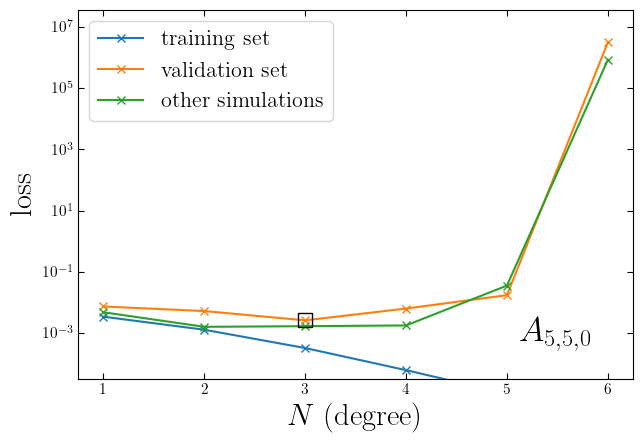

In [400]:
fig, ax = plt.subplots(figsize = (6.5, 4.5))

plot_to = 6

ax.semilogy(degrees[:plot_to], t_loss_list[:plot_to], label = 'training set', marker = 'x', c = 'C0')
ax.semilogy(degrees[:plot_to], v_loss_list[:plot_to], label = 'validation set', marker = 'x', c = 'C1')
ax.semilogy(degrees[:plot_to], full_loss_list[:plot_to], label = 'other simulations', marker = 'x', c = 'C2')

ax.plot(degrees[best_indx], v_loss_list[best_indx],
         marker = 's', markersize = 10, markerfacecolor = 'none', 
         markeredgewidth = 1, markeredgecolor = 'k')

ax.set_ylim(t_loss_list[best_indx]*0.1, None)

ax.set_xlabel('$N$ (degree)', fontsize = 22)
ax.set_ylabel('loss', fontsize = 22)

ax.text(0.925, 0.075, f'$A_{{{mode_string_plot_tex}}}$', fontsize=25, transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='bottom')

ax.legend(fontsize = 16)

fig.tight_layout()
plt.savefig(f'../../plots/loss_vs_degree_{mode_string_pro}.pdf')

In [401]:
best_degree = degrees[best_indx]

poly = PolynomialFeatures(degree=best_degree, include_bias=True)
poly_features = poly.fit_transform(X)
poly_features_full = poly.fit_transform(X_full)
X_t,X_v, y_t, y_v, w_t, w_v = train_test_split(poly_features,y,w,train_size=0.8,test_size=0.2,random_state=random_state)

length = X_t.shape[1]
X_t_copy = X_t.copy()
X_v_copy = X_v.copy()
X_full_copy = poly_features_full.copy()
del_indx_list = []
del_loss_list = [t_loss_list[best_indx]]
del_v_loss_list = [v_loss_list[best_indx]]
del_extra_v_loss_list = [full_loss_list[best_indx]]
for j in range(len(X_t[0])-1):
    del_indx = 1
    best_loss = np.inf
    for i in range(len(X_t_copy[0])):
        if i == 0:
            continue
        X_t_del = np.delete(X_t_copy, i, 1)
        X_v_del = np.delete(X_v_copy, i, 1)
        X_full_dell = np.delete(X_full_copy, i, 1)
        poly_reg_model_del = LinearRegression(fit_intercept = False)
        poly_reg_model_del.fit(X_t_del, y_t, sample_weight=w_t)
        loss = mse(y_t, poly_reg_model_del.predict(X_t_del), sample_weight=w_t)
        v_loss = mse(y_v, poly_reg_model_del.predict(X_v_del), sample_weight=w_v)
        extra_v_loss = mse(y_full, poly_reg_model_del.predict(X_full_dell), sample_weight=w_full)
        if loss < best_loss:
            best_loss = loss
            del_indx = i
    X_t_copy = np.delete(X_t_copy, del_indx, 1)
    X_v_copy = np.delete(X_v_copy, del_indx, 1)
    X_full_copy = np.delete(X_full_copy, del_indx, 1)
    del_indx_list.append(del_indx)
    del_loss_list.append(best_loss)
    del_v_loss_list.append(v_loss)
    del_extra_v_loss_list.append(extra_v_loss)

loss_list_order = del_loss_list[::-1]
v_loss_list_order = del_v_loss_list[::-1]
extra_v_loss_list_order = del_extra_v_loss_list[::-1]

In [402]:
x_points = (np.array(range(len(X_t[0]))) + 1)
v_loss_min = np.min(v_loss_list_order[:20])
best_term_indx = np.argmax(v_loss_list_order < v_loss_min*1.5)
best_term_num = x_points[best_term_indx]

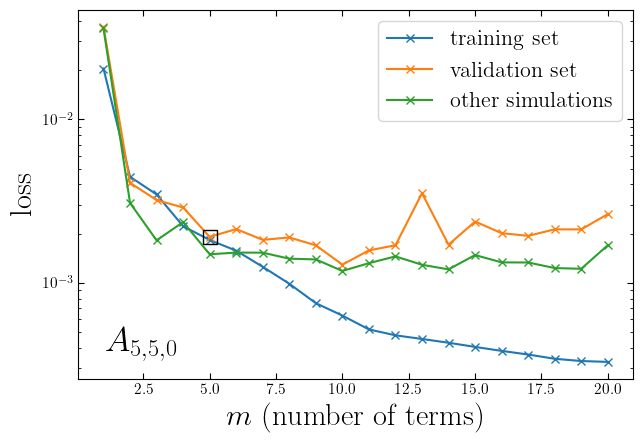

In [403]:
fig, ax = plt.subplots(figsize = (6.5, 4.5))

ax.semilogy(x_points, loss_list_order, label='training set', marker = 'x')
ax.semilogy(x_points, v_loss_list_order, label='validation set', marker = 'x')
ax.semilogy(x_points, extra_v_loss_list_order, label='other simulations', marker = 'x')
ax.plot(best_term_num, v_loss_list_order[best_term_indx], marker = 's', markersize = 10, markerfacecolor = 'none',
            markeredgewidth = 1, markeredgecolor = 'k')

ax.legend(fontsize = 16)
ax.set_xlabel('$m$ (number of terms)', fontsize = 22)
ax.set_ylabel('loss', fontsize = 22)

ax.text(0.05, 0.075, f'$A_{{{mode_string_plot_tex}}}$', fontsize=25, transform=ax.transAxes)

fig.tight_layout()
plt.savefig(f'../../plots/loss_vs_n_terms_{mode_string_pro}.pdf')

In [404]:
indx_list = list(range(len(poly_features[0])))
original_indx_del_list = []
for indx in del_indx_list:
    original_indx_del_list.append(indx_list[indx])
    del indx_list[indx]
original_indx_del_list.append(indx_list[0])

In [405]:
original_indx_order = original_indx_del_list[::-1]

In [406]:
include_terms = original_indx_order[:best_term_num]

In [407]:
include_terms_sorted = np.sort(include_terms)

In [408]:
X_t_red = X_t[:,include_terms_sorted]
X_v_red = X_v[:,include_terms_sorted]
poly_red = LinearRegression()
poly_red.fit(X_t_red, y_t, sample_weight=w_t)

LinearRegression()

In [409]:
def to_sigfig(num, sigfig = 4):
    return np.format_float_positional(num, precision=sigfig, fractional = False, trim = '-')

In [410]:
def poly_expression_latex(powers, poly_red, variables = ['\eta', '\chi_+', '\chi_-'], sigfig = 4, real = False):
    save_array = []
    complex_intercept = poly_red.intercept_[0] + 1.j*poly_red.intercept_[1]
    save_array.append([0, 0, 0, poly_red.intercept_[0], poly_red.intercept_[1]])
    intercept_A = np.abs(complex_intercept)
    intercept_phi = np.angle(complex_intercept)
    if intercept_phi < 0:
        intercept_phi += 2*np.pi
    if real:
        if 3*np.pi/2 > intercept_phi > np.pi/2:
            expression = f'- {to_sigfig(intercept_A, sigfig = sigfig)}'
        else:
            expression = f'{to_sigfig(intercept_A, sigfig = sigfig)}'
    else:
        expression = f'{to_sigfig(intercept_A, sigfig = sigfig)} e^{{i {to_sigfig(intercept_phi, sigfig = sigfig)}}}'
    for p, power in enumerate(powers):
        if np.all(power == 0):
            continue
        complex_coeff = poly_red.coef_[0][p] + 1.j*poly_red.coef_[1][p]
        save_array.append([power[0], power[1], power[2], poly_red.coef_[0][p], poly_red.coef_[1][p]])
        coeff_A = np.abs(complex_coeff)
        coeff_phi = np.angle(complex_coeff)
        if coeff_phi < 0:
            coeff_phi += 2*np.pi
        if real:
            if 3*np.pi/2 > coeff_phi > np.pi/2:
                coef_expression = f' - {to_sigfig(coeff_A, sigfig = sigfig)}'
            else:
                coef_expression = f' + {to_sigfig(coeff_A, sigfig = sigfig)}'
        else:
            coef_expression = f' + {to_sigfig(coeff_A, sigfig = sigfig)} e^{{i {to_sigfig(coeff_phi, sigfig = sigfig)}}}'
        expression += coef_expression
        for i in range(len(power)):
            if power[i] == 0:
                continue
            if power[i] == 1:
                expression += f' {variables[i]}'
            else:
                expression += f' {variables[i]}^{power[i]}'
    save_array = np.array(save_array)
    return expression, save_array

In [411]:
from IPython.display import display, Math

In [412]:
tex_expression, save_array = poly_expression_latex(poly.powers_[include_terms_sorted], poly_red, real = (mode_string_pro == '2.2.0'))
display(Math(tex_expression))

<IPython.core.display.Math object>

In [413]:
with open(f'./fit_expressions/hyperfit_tex_{mode_string_pro}.txt', 'w') as f:
    f.write(tex_expression)

np.savetxt(f'./fit_expressions/hyperfit_array_{mode_string_pro}.csv', save_array)

In [414]:
# y_pred = models[best_indx].predict(poly_features_list[best_indx])
y_pred = poly_red.predict(poly_features[:, include_terms_sorted])
y_pred_full = poly_red.predict(poly_features_full[:, include_terms_sorted])

In [415]:
df_mode_3D['A_pred'] = (y_pred[:,0] + 1.j*y_pred[:,1])*PN_func(df_mode_3D['eta'])
df_mode_3D['A_pred_norm'] = np.abs(df_mode_3D['A_pred'])
df_mode_3D['A_pred_err'] = np.abs(df_mode_3D['A_pred'] - df_mode_3D['A_comp_unadj'])
df_mode_3D['A_pred_rel_err'] = np.abs(df_mode_3D['A_pred_err']/df_mode_3D['A_comp_unadj'])
df_mode_3D['A_pred_log'] = np.log10(df_mode_3D['A_pred'])
df_mode_3D['A_pred_err_log'] = np.log10(df_mode_3D['A_pred_err'])
df_mode_3D['A_pred_rel_err_log'] = np.log10(df_mode_3D['A_pred_rel_err'])
df_mode_3D['A_pred_err_sig'] = df_mode_3D['A_pred_rel_err']/df_mode_3D['A_range']

In [416]:
df_mode_3D_full['A_pred'] = (y_pred_full[:,0] + 1.j*y_pred_full[:,1])*PN_func(df_mode_3D_full['eta'])
df_mode_3D_full['A_pred_norm'] = np.abs(df_mode_3D_full['A_pred'])
df_mode_3D_full['A_pred_err'] = np.abs(df_mode_3D_full['A_pred'] - df_mode_3D_full['A_comp_unadj'])
df_mode_3D_full['A_pred_rel_err'] = np.abs(df_mode_3D_full['A_pred_err']/df_mode_3D_full['A_comp_unadj'])
df_mode_3D_full['A_pred_log'] = np.log10(df_mode_3D_full['A_pred'])
df_mode_3D_full['A_pred_err_log'] = np.log10(df_mode_3D_full['A_pred_err'])
df_mode_3D_full['A_pred_rel_err_log'] = np.log10(df_mode_3D_full['A_pred_rel_err'])
df_mode_3D_full['A_pred_err_sig'] = df_mode_3D_full['A_pred_rel_err']/df_mode_3D_full['A_range']

In [417]:
df_mode_3D.sort_values('A_pred_rel_err', ascending = False)[['SXS_num', 'eta', 'q', 'chi_rem', 'A_med', 'A_comp', 'A_pred', 'A_pred_rel_err', 'A_pred_err']][:10]

,SXS_num,eta,q,chi_rem,A_med,A_comp,A_pred,A_pred_rel_err,A_pred_err
817,248,0.222238,1.999566,0.711587,0.010351,0.035557+0.135176j,-0.012403+0.004397j,1.550547,0.016050
1101,260,0.187524,2.999230,0.124471,0.008591,-0.030095-0.086559j,-0.007985-0.020204j,1.530186,0.013146
998,256,0.222224,1.999957,0.838563,0.011191,0.088335+0.122567j,-0.008399+0.006895j,1.349379,0.015101
511,235,0.222224,1.999946,0.387706,0.015137,-0.056386-0.196415j,-0.014561+0.000413j,1.203226,0.018213
1441,273,0.187522,2.999296,0.392384,0.010937,-0.097859-0.063522j,0.001250-0.009898j,1.019017,0.011145
4024,1459,0.212693,2.258915,0.889665,0.011540,-0.139811+0.013450j,-0.002352+0.007569j,0.969714,0.011191
3810,1453,0.209325,2.352106,0.840610,0.017431,-0.155270-0.136066j,-0.000974-0.000811j,0.927329,0.016165
2025,292,0.187523,2.999266,0.826624,0.023062,-0.075675-0.234086j,0.008729-0.007771j,0.921083,0.021242
1508,275,0.187504,2.999873,0.521343,0.018618,-0.139342-0.141507j,0.003128-0.008613j,0.904833,0.016846
1309,268,0.187510,2.999682,0.341247,0.011369,-0.102585-0.064686j,-0.000317-0.010298j,0.898803,0.010219


In [418]:
df_mode_3D_full.sort_values('A_pred_rel_err', ascending = False)[['SXS_num', 'eta', 'q', 'chi_rem', 'A_med', 'A_pred_rel_err', 'A_pred_err']][:10]

,SXS_num,eta,q,chi_rem,A_med,A_pred_rel_err,A_pred_err
3216,388,0.231395,1.750265,0.882193,0.011873,1.838985,0.021835
6024,1179,0.187501,2.999974,0.538955,0.011244,1.038537,0.011678
906,174,0.187459,3.001317,0.755533,0.025868,0.848132,0.021939
1743,203,0.109360,7.001287,0.605656,0.026330,0.817945,0.021536
251,38,0.187459,3.001328,0.316338,0.040169,0.793819,0.031887
5992,1178,0.187501,2.999974,0.539443,0.013642,0.757147,0.010329
9304,2131,0.222228,1.999854,0.917562,0.015110,0.744495,0.011250
1683,200,0.179273,3.272497,0.520264,0.018361,0.729932,0.013402
9347,2132,0.222228,1.999854,0.841638,0.020127,0.716220,0.014415
1451,193,0.172906,3.497587,0.504351,0.017814,0.715037,0.012738


array([[<AxesSubplot: title={'center': 'A_pred_rel_err_log'}>]],
      dtype=object)

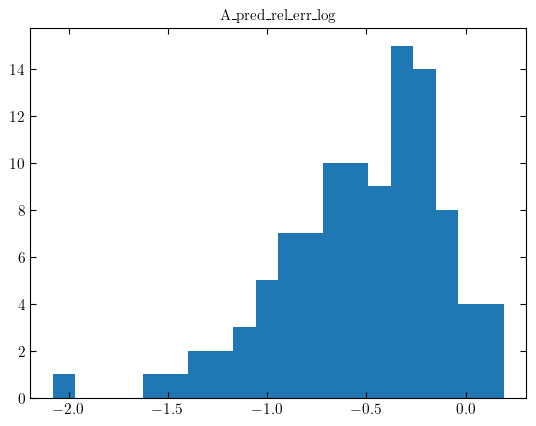

In [419]:
df_mode_3D.hist('A_pred_rel_err_log', bins = 20, grid = False)

In [420]:
# color the histogram according to A_range/A
rel_err_min = df_mode_3D['A_pred_rel_err_log'].min()
rel_err_max = df_mode_3D['A_pred_rel_err_log'].max()
rel_err_color_list = np.linspace(rel_err_min, rel_err_max, 11)
cmap_val_list = np.linspace(0, 1, 11)
bins = np.linspace(0, df_mode_3D["A_pred_err_sig"].max(), 20)

In [421]:
from matplotlib.cm import get_cmap

cmap = get_cmap('viridis')

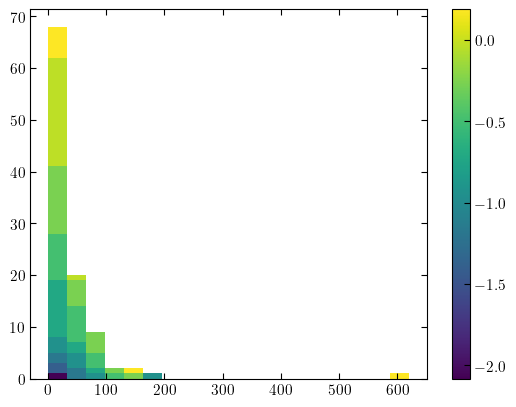

In [422]:
fig, ax = plt.subplots()

for cmap_val, rel_err_color in zip(cmap_val_list[::-1], rel_err_color_list[::-1]):
    ax.hist(df_mode_3D[df_mode_3D["A_pred_rel_err_log"] <= rel_err_color]['A_pred_err_sig'], 
            bins = bins,
            color = cmap(cmap_val))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=rel_err_min, vmax=rel_err_max))
sm._A = []
cbar = fig.colorbar(sm, ax = ax)


In [423]:
df_mode_3D_copy = df_mode_3D.copy()
df_mode_3D_copy.sort_values('A_med', ascending = True, inplace = True)

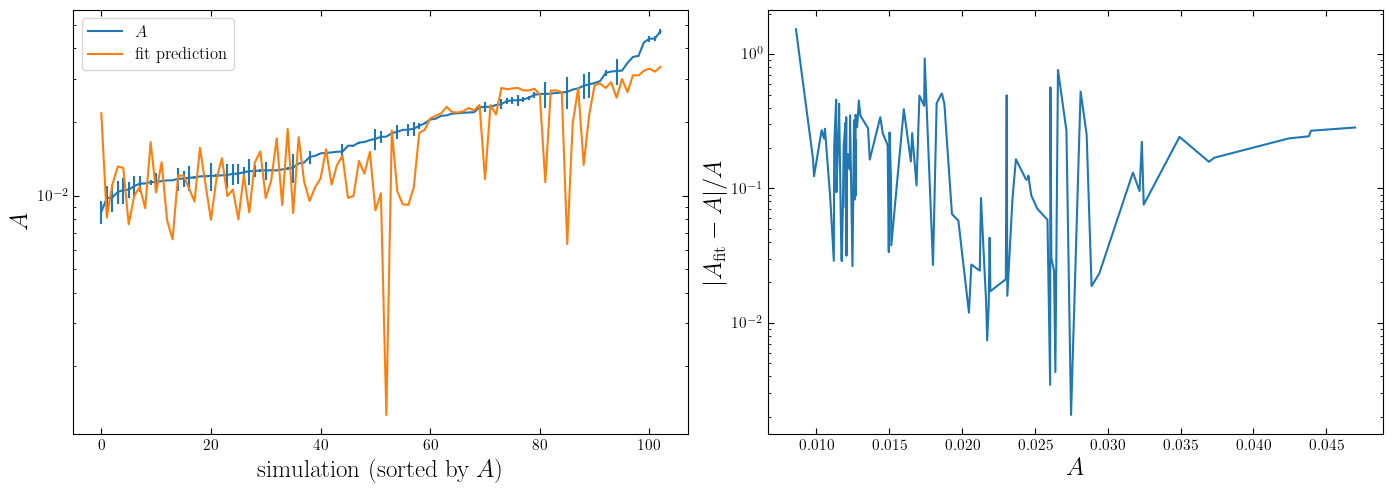

In [424]:
fig, axs = plt.subplots(1, 2, figsize = (14, 5))
axs[0].semilogy(df_mode_3D_copy['A_med'].to_numpy(), label = r'$A$')
axs[0].errorbar(range(len(df_mode_3D_copy)), df_mode_3D_copy['A_med'].to_numpy(), 
             yerr = df_mode_3D_copy['A_med'].to_numpy()*df_mode_3D_copy['A_range'].to_numpy(), fmt = 'none',
             )
axs[0].semilogy(df_mode_3D_copy['A_pred_norm'].to_numpy(), label = r'fit prediction')
axs[0].set_xlabel(r'simulation (sorted by $A$)')
axs[0].set_ylabel(r'$A$')
axs[0].legend()

axs[1].semilogy(df_mode_3D_copy['A_med'].to_numpy(), np.abs(df_mode_3D_copy['A_med'].to_numpy() - df_mode_3D_copy['A_pred_norm'].to_numpy())/df_mode_3D_copy['A_med'].to_numpy())
axs[1].set_xlabel(r'$A$')
axs[1].set_ylabel(r'$|A_{\rm fit} - A|/A$')

fig.tight_layout()
plt.savefig(f'../../plots/A_fit_vs_A_{mode_string_pro}.pdf')
plt.savefig(f'../../plots/A_fit_vs_A_{mode_string_pro}.png', dpi = 300, bbox_inches = 'tight', transparent = False, facecolor='white')

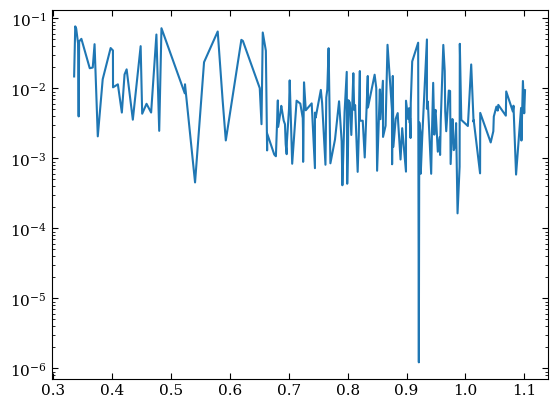

In [58]:
plt.semilogy(df_mode_3D_copy['A_med'].to_numpy(), np.abs(df_mode_3D_copy['A_med'].to_numpy() - df_mode_3D_copy['A_pred_norm'].to_numpy())/df_mode_3D_copy['A_med'].to_numpy())

In [502]:
import plotly.express as px
fig = px.scatter_3d(df_mode_3D, x='chi_p', y='chi_m', z='eta',
                    color='A_pred_rel_err_log', size='A_range_adj_abs_rel_inv', size_max=50,
                    hover_name = 'SXS_num',
                    hover_data = ['A_med', 'A_pred_norm', 'A_med_adj', 'chi_1_z', 'chi_2_z', 'q', 'chi_rem', 'A_range'])
fig.show()

In [1076]:
import plotly.express as px
fig = px.scatter_3d(df_mode_3D, x='chi_p', y='chi_m', z='eta',
                    color='A_pred_rel_err_log', size='A_range_inv', size_max=50,
                    hover_name = 'SXS_num',
                    hover_data = ['A_med', 'A_pred_norm', 'A_med_adj', 'chi_1_z', 'chi_2_z', 'q', 'chi_rem', 'A_range'])
fig.show()

In [1077]:
import plotly.express as px
fig = px.scatter_3d(df_mode_3D, x='chi_p', y='chi_m', z='eta',
                    color='A_med', size='A_range_inv', size_max=50,
                    hover_name = 'SXS_num',
                    hover_data = ['A_med', 'A_pred_norm', 'chi_1_z', 'chi_2_z', 'q', 'chi_rem', 'A_range'])
fig.show()

In [1078]:
import plotly.express as px
fig = px.scatter_3d(df_mode_3D, x='chi_p', y='chi_m', z='eta',
                    color='A_pred_norm', size='A_range_inv', size_max=50,
                    hover_name = 'SXS_num',
                    hover_data = ['A_med', 'A_pred_norm', 'chi_1_z', 'chi_2_z', 'q', 'chi_rem', 'A_range'])
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_mode_3D_full, x='chi_p', y='chi_m', z='eta',
                    color='A_pred_rel_err_log', size='A_range_inv', size_max=50,
                    hover_name = 'SXS_num',
                    hover_data = ['A_med', 'A_med_adj', 'A_pred', 'chi_1_z', 'chi_2_z', 'q', 'chi_rem', 'A_range'])
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_mode_3D_full, x='chi_p', y='chi_m', z='eta',
                    color='A_med', size='A_range_inv', size_max=50,
                    hover_name = 'SXS_num',
                    hover_data = ['A_med', 'A_pred', 'chi_1_z', 'chi_2_z', 'q', 'chi_rem', 'A_range'])
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_mode_3D_full, x='chi_p', y='chi_m', z='eta',
                    color='A_pred', size='A_range_inv', size_max=50,
                    hover_name = 'SXS_num',
                    hover_data = ['A_med', 'A_pred', 'chi_1_z', 'chi_2_z', 'q', 'chi_rem', 'A_range'])
fig.show()